# Phase 5: Visualize Complete Registration Results

This notebook provides comprehensive visualization of the complete 4-phase OCT registration pipeline.

## What this shows:
- Before/after vessel alignment
- Before/after surface alignment
- 3D transformation parameters
- Quality metrics and confidence scores
- Interactive exploration of aligned volumes

## Setup and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ipywidgets import interact, IntSlider

# Setup
data_dir = Path('data')
plt.rcParams['figure.figsize'] = (15, 10)

print("✓ Imports complete")

✓ Imports complete


In [2]:
# Load all registration data
print("Loading registration results...")

# Phase 1: Surfaces
surface_v0 = np.load(data_dir / 'surface_peaks_volume0.npy')
surface_v1 = np.load(data_dir / 'surface_peaks_volume1.npy')
surface_v1_aligned = np.load(data_dir / 'surface_v1_fully_aligned.npy')

# Phase 2: Vessels
skeleton_v0 = np.load(data_dir / 'vessel_skeleton_volume0.npy')
skeleton_v1 = np.load(data_dir / 'vessel_skeleton_volume1.npy')
skeleton_v1_aligned = np.load(data_dir / 'skeleton_v1_aligned.npy')

bifurcations_v0 = np.load(data_dir / 'bifurcation_coords_volume0.npy')
bifurcations_v1 = np.load(data_dir / 'bifurcation_coords_volume1.npy')
bifurcations_v1_aligned = np.load(data_dir / 'bifurcations_v1_aligned.npy')

# Phase 3 & 4: Registration parameters
xy_params = np.load(data_dir / 'xy_registration_params.npy', allow_pickle=True).item()
registration_3d = np.load(data_dir / 'registration_3d_params.npy', allow_pickle=True).item()

print(f"✓ Loaded all data")
print(f"\nData shapes:")
print(f"  Surfaces: {surface_v0.shape}")
print(f"  Vessels: {skeleton_v0.shape}")
print(f"  Bifurcations V0: {len(bifurcations_v0)}")
print(f"  Bifurcations V1: {len(bifurcations_v1)}")

Loading registration results...
✓ Loaded all data

Data shapes:
  Surfaces: (1536, 360)
  Vessels: (1216, 1216)
  Bifurcations V0: 2094
  Bifurcations V1: 5539


## 1. Display Registration Parameters

In [3]:
print("=" * 70)
print("3D REGISTRATION PARAMETERS")
print("=" * 70)
print()
print("📍 XY Registration (Phase 3):")
print(f"   Translation (dy, dx): ({registration_3d['translation_xy'][0]:.2f}, {registration_3d['translation_xy'][1]:.2f}) pixels")
print(f"   Inlier ratio: {registration_3d['xy_inlier_ratio']:.2%}")
print(f"   Improvement: {registration_3d['xy_improvement']*100:.1f}%")
print()
print("📏 Depth Alignment (Phase 4):")
print(f"   Method used: {registration_3d['depth_method_used']}")
print(f"   Depth offset: {registration_3d['depth_offset_final']:.2f} pixels")
print(f"   Confidence: {registration_3d['depth_confidence_final']:.2%}")
print()
print("   Method comparison:")
print(f"     • Median: {registration_3d['depth_offset_median']:.2f} px (conf: {registration_3d['depth_confidence_median']:.2%})")
print(f"     • Correlation: {registration_3d['depth_offset_correlation']:.2f} px (conf: {registration_3d['depth_confidence_correlation']:.2%})")
print()
print("🎯 FINAL 3D TRANSFORM:")
transform = registration_3d['transform_3d']
print(f"   X translation (lateral): {transform['dx']:.2f} pixels")
print(f"   Y translation (depth):   {transform['dy']:.2f} pixels")
print(f"   Z translation (B-scan):  {transform['dz']:.2f} pixels")
print("=" * 70)

3D REGISTRATION PARAMETERS

📍 XY Registration (Phase 3):
   Translation (dy, dx): (0.00, 0.00) pixels
   Inlier ratio: 33.51%
   Improvement: 0.0%

📏 Depth Alignment (Phase 4):
   Method used: Correlation (Method B)
   Depth offset: 75.00 pixels
   Confidence: 100.00%

   Method comparison:
     • Median: 75.00 px (conf: 16.73%)
     • Correlation: 75.00 px (conf: 100.00%)

🎯 FINAL 3D TRANSFORM:
   X translation (lateral): 0.00 pixels
   Y translation (depth):   75.00 pixels
   Z translation (B-scan):  0.00 pixels


## 2. Vessel Skeleton Alignment

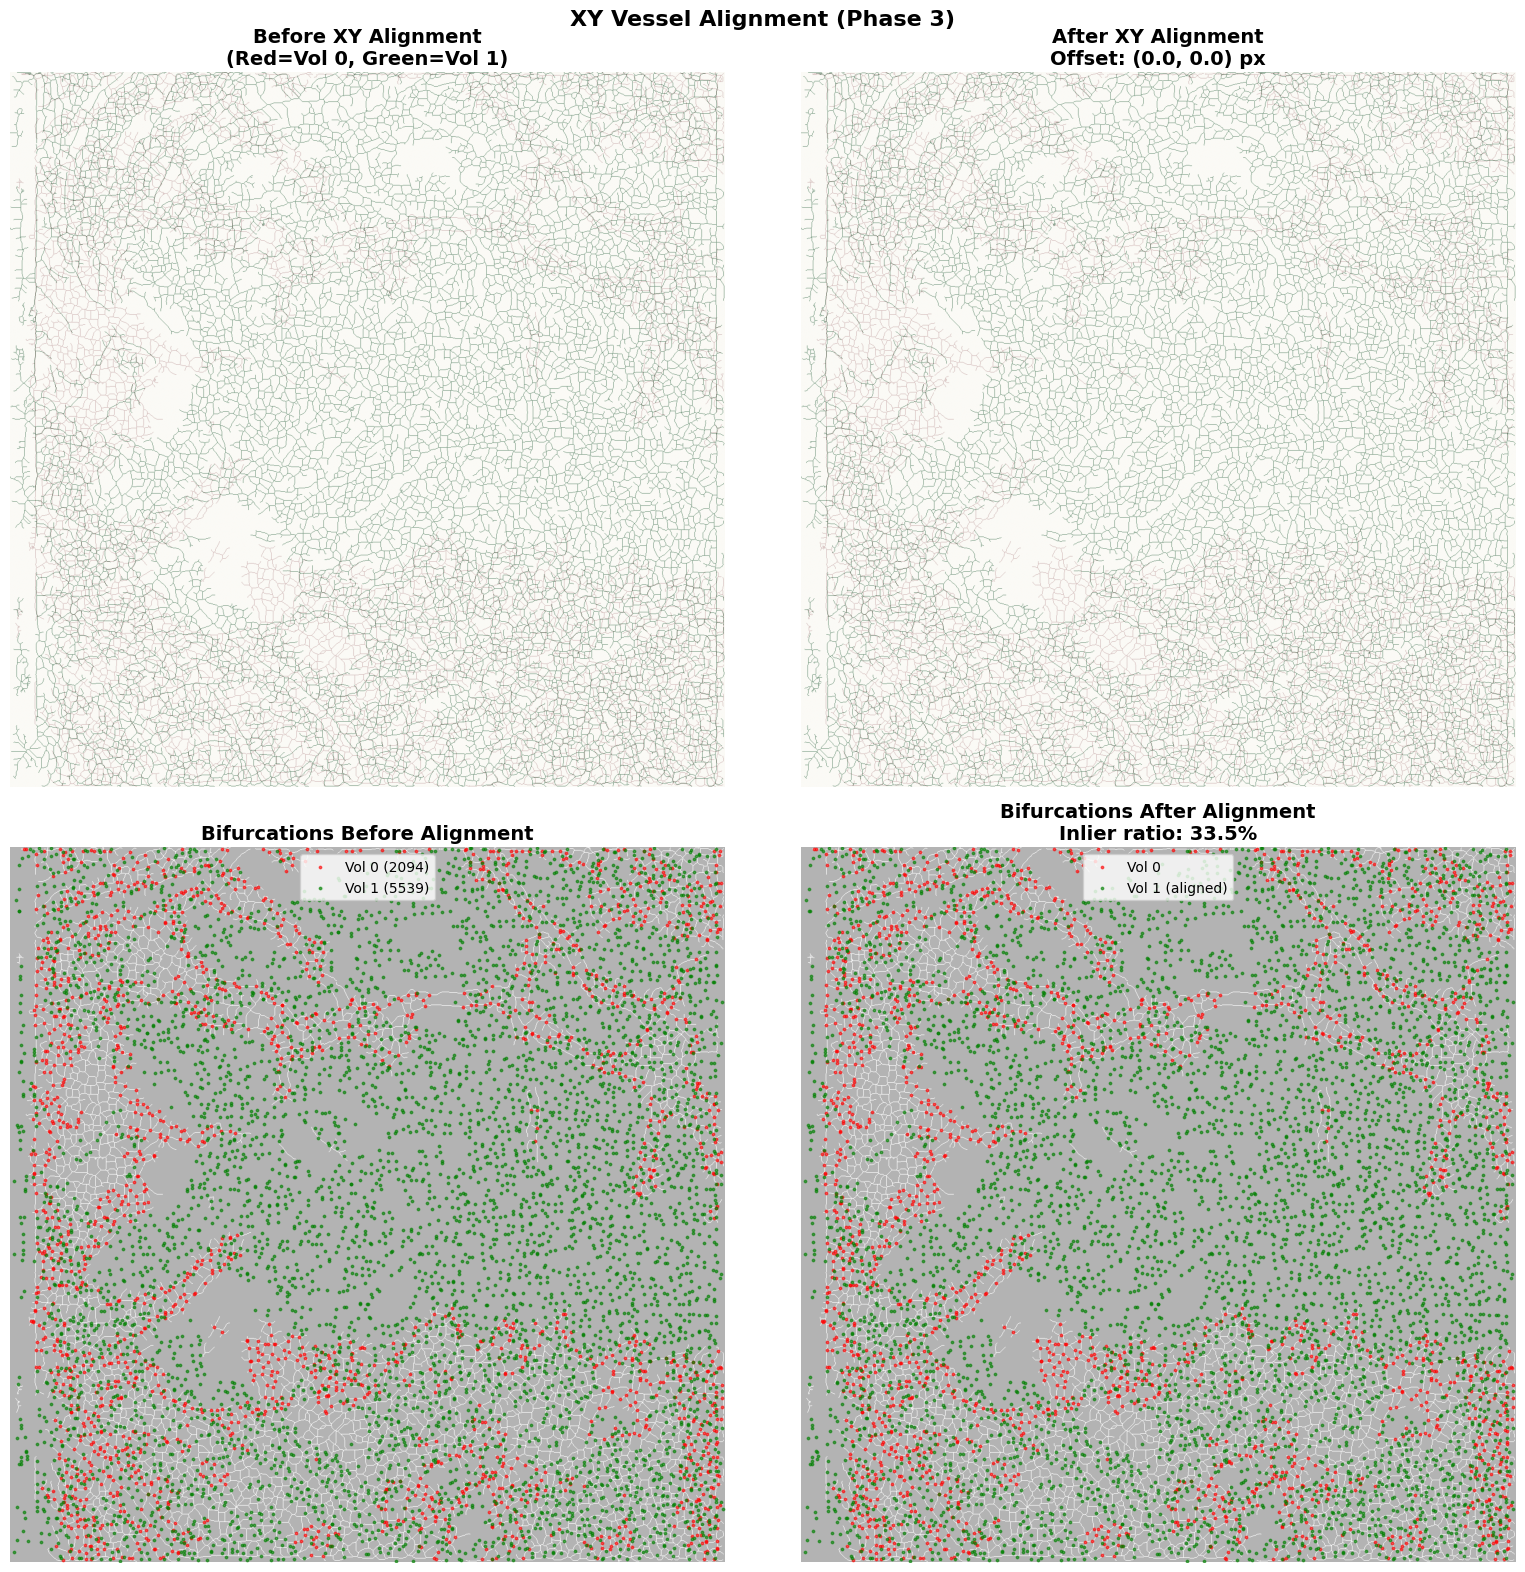

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Before alignment
axes[0, 0].imshow(skeleton_v0, cmap='Reds', alpha=0.5)
axes[0, 0].imshow(skeleton_v1, cmap='Greens', alpha=0.5)
axes[0, 0].set_title('Before XY Alignment\n(Red=Vol 0, Green=Vol 1)', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# After alignment
axes[0, 1].imshow(skeleton_v0, cmap='Reds', alpha=0.5)
axes[0, 1].imshow(skeleton_v1_aligned, cmap='Greens', alpha=0.5)
axes[0, 1].set_title(f'After XY Alignment\nOffset: ({registration_3d["translation_xy"][0]:.1f}, {registration_3d["translation_xy"][1]:.1f}) px', 
                    fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

# Bifurcations before
axes[1, 0].imshow(skeleton_v0, cmap='gray', alpha=0.3)
axes[1, 0].scatter(bifurcations_v0[:, 1], bifurcations_v0[:, 0], c='red', s=3, alpha=0.6, label=f'Vol 0 ({len(bifurcations_v0)})')
axes[1, 0].scatter(bifurcations_v1[:, 1], bifurcations_v1[:, 0], c='green', s=3, alpha=0.6, label=f'Vol 1 ({len(bifurcations_v1)})')
axes[1, 0].set_title('Bifurcations Before Alignment', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].axis('off')

# Bifurcations after
axes[1, 1].imshow(skeleton_v0, cmap='gray', alpha=0.3)
axes[1, 1].scatter(bifurcations_v0[:, 1], bifurcations_v0[:, 0], c='red', s=3, alpha=0.6, label=f'Vol 0')
axes[1, 1].scatter(bifurcations_v1_aligned[:, 1], bifurcations_v1_aligned[:, 0], c='green', s=3, alpha=0.6, label=f'Vol 1 (aligned)')
axes[1, 1].set_title(f'Bifurcations After Alignment\nInlier ratio: {registration_3d["xy_inlier_ratio"]:.1%}', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].axis('off')

plt.suptitle('XY Vessel Alignment (Phase 3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Surface Depth Alignment

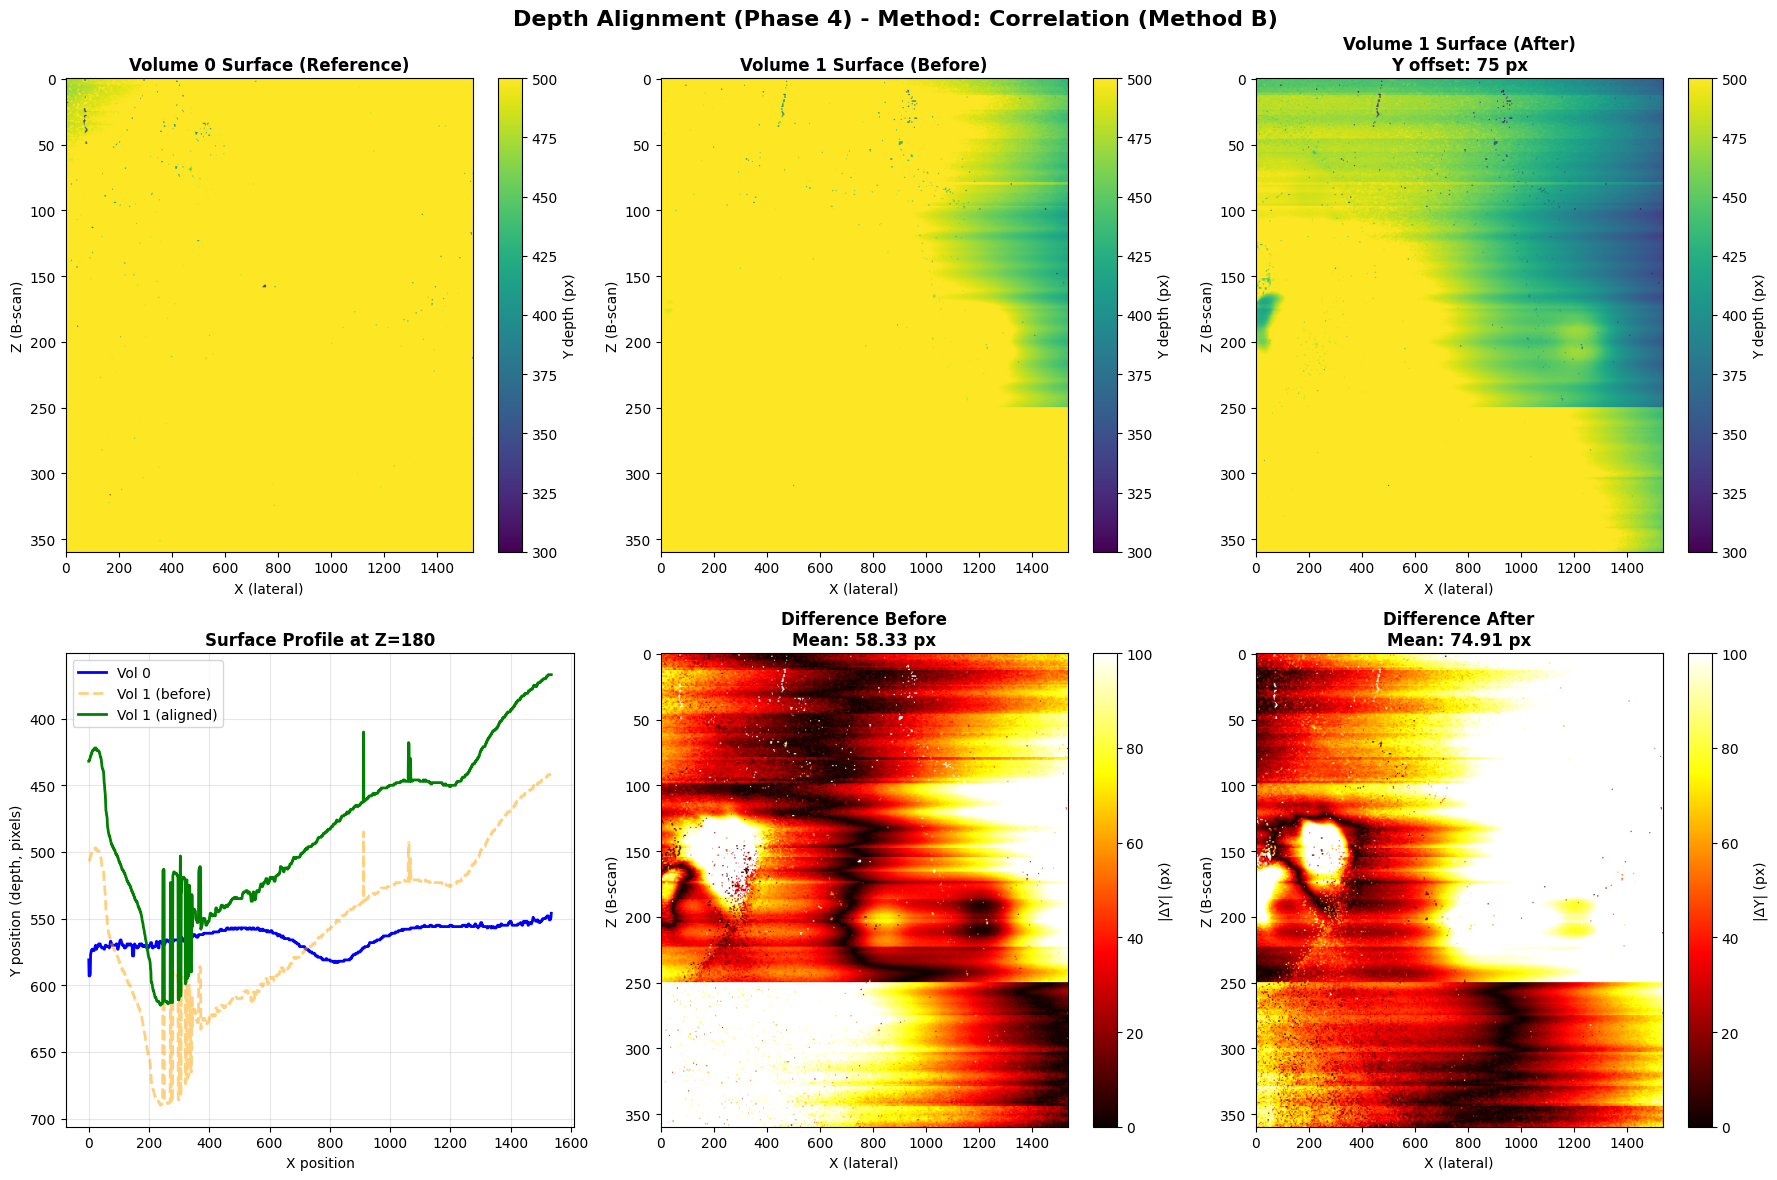

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Surface maps
im0 = axes[0, 0].imshow(surface_v0.T, aspect='auto', cmap='viridis', vmin=300, vmax=500)
axes[0, 0].set_title('Volume 0 Surface (Reference)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('X (lateral)')
axes[0, 0].set_ylabel('Z (B-scan)')
plt.colorbar(im0, ax=axes[0, 0], label='Y depth (px)')

im1 = axes[0, 1].imshow(surface_v1.T, aspect='auto', cmap='viridis', vmin=300, vmax=500)
axes[0, 1].set_title('Volume 1 Surface (Before)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('X (lateral)')
axes[0, 1].set_ylabel('Z (B-scan)')
plt.colorbar(im1, ax=axes[0, 1], label='Y depth (px)')

im2 = axes[0, 2].imshow(surface_v1_aligned.T, aspect='auto', cmap='viridis', vmin=300, vmax=500)
axes[0, 2].set_title(f'Volume 1 Surface (After)\nY offset: {registration_3d["depth_offset_final"]:.0f} px', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('X (lateral)')
axes[0, 2].set_ylabel('Z (B-scan)')
plt.colorbar(im2, ax=axes[0, 2], label='Y depth (px)')

# Cross-sections
mid_z = surface_v0.shape[1] // 2
axes[1, 0].plot(surface_v0[:, mid_z], label='Vol 0', linewidth=2, color='blue')
axes[1, 0].plot(surface_v1[:, mid_z], label='Vol 1 (before)', linewidth=2, linestyle='--', alpha=0.5, color='orange')
axes[1, 0].plot(surface_v1_aligned[:, mid_z], label='Vol 1 (aligned)', linewidth=2, color='green')
axes[1, 0].set_xlabel('X position')
axes[1, 0].set_ylabel('Y position (depth, pixels)')
axes[1, 0].set_title(f'Surface Profile at Z={mid_z}', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].invert_yaxis()

# Difference before
diff_before = np.abs(surface_v0 - surface_v1)
im3 = axes[1, 1].imshow(diff_before.T, aspect='auto', cmap='hot', vmax=100)
axes[1, 1].set_title(f'Difference Before\nMean: {np.nanmean(diff_before):.2f} px', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('X (lateral)')
axes[1, 1].set_ylabel('Z (B-scan)')
plt.colorbar(im3, ax=axes[1, 1], label='|ΔY| (px)')

# Difference after
diff_after = np.abs(surface_v0 - surface_v1_aligned)
im4 = axes[1, 2].imshow(diff_after.T, aspect='auto', cmap='hot', vmax=100)
axes[1, 2].set_title(f'Difference After\nMean: {np.nanmean(diff_after):.2f} px', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('X (lateral)')
axes[1, 2].set_ylabel('Z (B-scan)')
plt.colorbar(im4, ax=axes[1, 2], label='|ΔY| (px)')

plt.suptitle(f'Depth Alignment (Phase 4) - Method: {registration_3d["depth_method_used"]}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Checkerboard Visualization

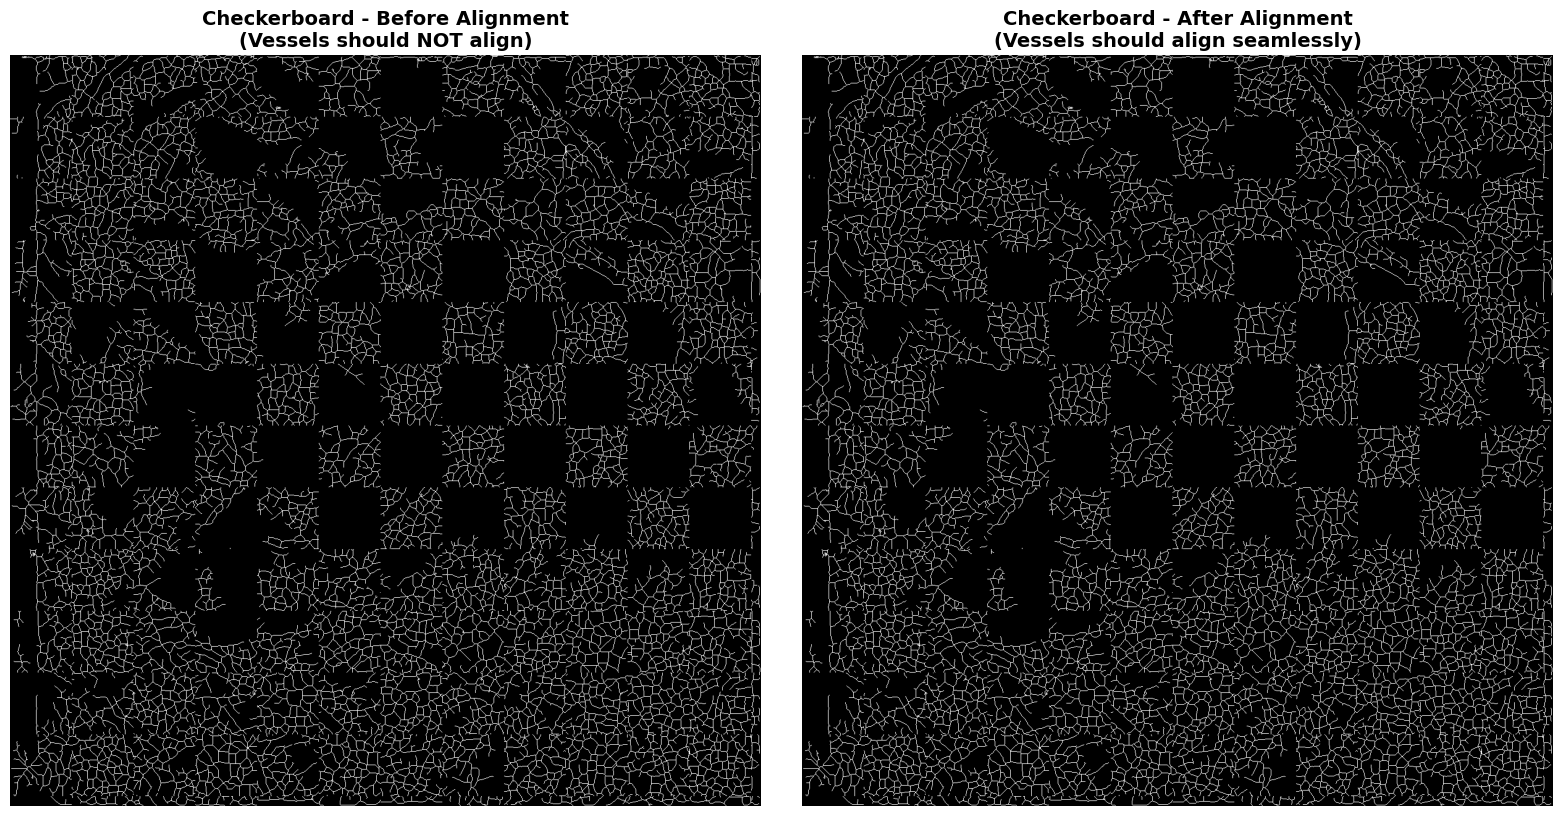

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Create checkerboard pattern
checker_size = 100
h, w = skeleton_v0.shape
checkerboard = np.zeros((h, w), dtype=bool)
for i in range(0, h, checker_size):
    for j in range(0, w, checker_size):
        if ((i // checker_size) + (j // checker_size)) % 2 == 0:
            checkerboard[i:i+checker_size, j:j+checker_size] = True

# Before alignment
checker_before = skeleton_v0.copy()
checker_before[~checkerboard] = skeleton_v1[~checkerboard]
axes[0].imshow(checker_before, cmap='gray')
axes[0].set_title('Checkerboard - Before Alignment\n(Vessels should NOT align)', fontsize=14, fontweight='bold')
axes[0].axis('off')

# After alignment
checker_after = skeleton_v0.copy()
checker_after[~checkerboard] = skeleton_v1_aligned[~checkerboard]
axes[1].imshow(checker_after, cmap='gray')
axes[1].set_title('Checkerboard - After Alignment\n(Vessels should align seamlessly)', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 5. Quality Metrics Summary

/tmp/ipykernel_186615/4258482578.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipykernel_186615/4258482578.py:58: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipykernel_186615/4258482578.py:58: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/aristarx/Diploma/RetinaBuilder/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aristarx/Diploma/RetinaBuilder/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aristarx/Diploma/RetinaBuilder/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWa

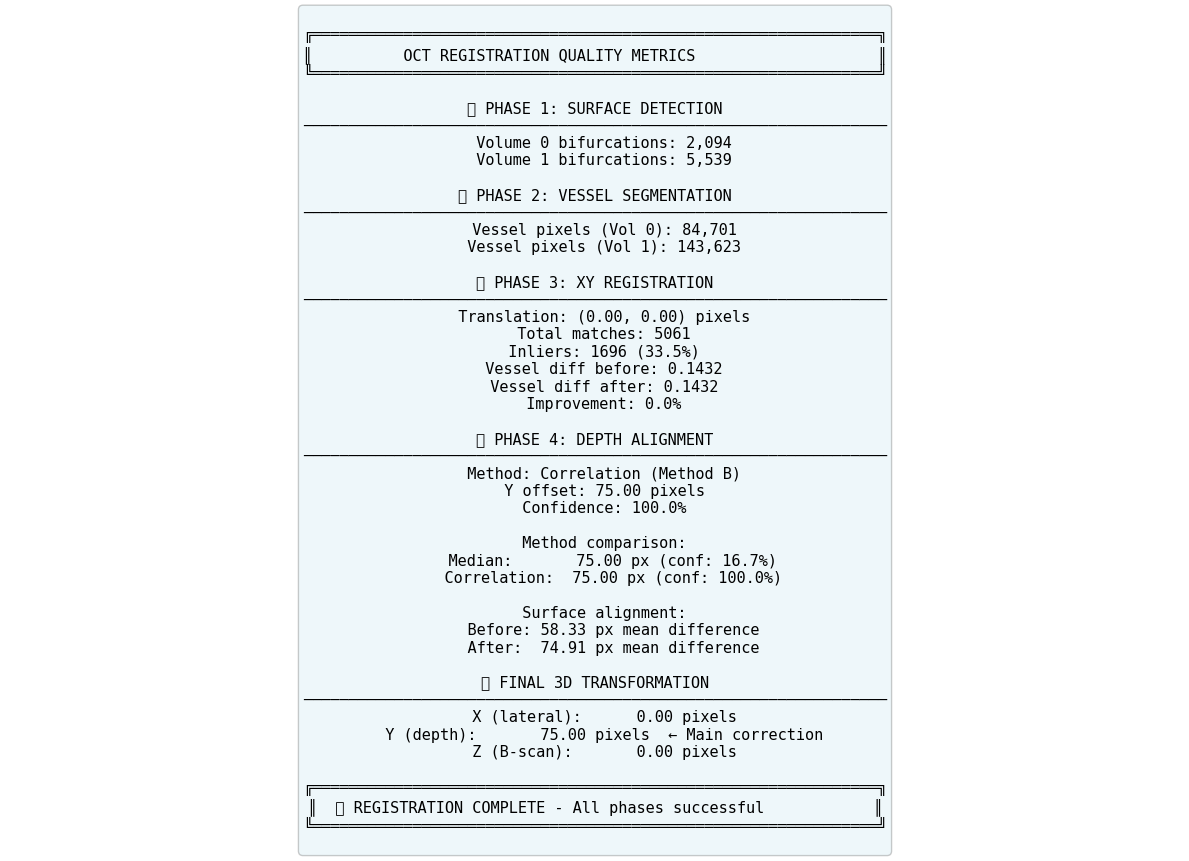

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

metrics_text = f"""
╔══════════════════════════════════════════════════════════════╗
║          OCT REGISTRATION QUALITY METRICS                    ║
╚══════════════════════════════════════════════════════════════╝

📊 PHASE 1: SURFACE DETECTION
────────────────────────────────────────────────────────────────
  Volume 0 bifurcations: {len(bifurcations_v0):,}
  Volume 1 bifurcations: {len(bifurcations_v1):,}
  
📊 PHASE 2: VESSEL SEGMENTATION
────────────────────────────────────────────────────────────────
  Vessel pixels (Vol 0): {skeleton_v0.sum():,.0f}
  Vessel pixels (Vol 1): {skeleton_v1.sum():,.0f}
  
📊 PHASE 3: XY REGISTRATION
────────────────────────────────────────────────────────────────
  Translation: ({registration_3d['translation_xy'][0]:.2f}, {registration_3d['translation_xy'][1]:.2f}) pixels
  Total matches: {xy_params['num_matches']}
  Inliers: {xy_params['num_inliers']} ({registration_3d['xy_inlier_ratio']:.1%})
  Vessel diff before: {xy_params['mean_diff_before']:.4f}
  Vessel diff after: {xy_params['mean_diff_after']:.4f}
  Improvement: {registration_3d['xy_improvement']*100:.1f}%
  
📊 PHASE 4: DEPTH ALIGNMENT
────────────────────────────────────────────────────────────────
  Method: {registration_3d['depth_method_used']}
  Y offset: {registration_3d['depth_offset_final']:.2f} pixels
  Confidence: {registration_3d['depth_confidence_final']:.1%}
  
  Method comparison:
    Median:       {registration_3d['depth_offset_median']:.2f} px (conf: {registration_3d['depth_confidence_median']:.1%})
    Correlation:  {registration_3d['depth_offset_correlation']:.2f} px (conf: {registration_3d['depth_confidence_correlation']:.1%})
  
  Surface alignment:
    Before: {registration_3d['surface_diff_before']:.2f} px mean difference
    After:  {registration_3d['surface_diff_after']:.2f} px mean difference
  
🎯 FINAL 3D TRANSFORMATION
────────────────────────────────────────────────────────────────
  X (lateral):  {registration_3d['transform_3d']['dx']:>8.2f} pixels
  Y (depth):    {registration_3d['transform_3d']['dy']:>8.2f} pixels  ← Main correction
  Z (B-scan):   {registration_3d['transform_3d']['dz']:>8.2f} pixels
  
╔══════════════════════════════════════════════════════════════╗
║  ✅ REGISTRATION COMPLETE - All phases successful            ║
╚══════════════════════════════════════════════════════════════╝
"""

ax.text(0.5, 0.5, metrics_text, transform=ax.transAxes,
       fontsize=11, verticalalignment='center', horizontalalignment='center',
       fontfamily='monospace',
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2))

plt.tight_layout()
plt.show()

## 6. Export Results

Save individual figures for publication or reporting.

In [8]:
output_dir = Path('figures')
output_dir.mkdir(exist_ok=True)

print("Saving individual figures...")

# You can uncomment and run these to save individual figures:
fig1.savefig(output_dir / 'vessel_alignment.png', dpi=300, bbox_inches='tight')
fig2.savefig(output_dir / 'surface_alignment.png', dpi=300, bbox_inches='tight')
fig3.savefig(output_dir / 'checkerboard.png', dpi=300, bbox_inches='tight')

print(f"✓ Figures saved to: {output_dir}")
print("\n✅ Visualization notebook complete!")

Saving individual figures...
✓ Figures saved to: figures

✅ Visualization notebook complete!
